<a href="https://colab.research.google.com/github/utpalrtw/utpalrtw/blob/CNN/Flower_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Flower Recognition Using Convolutional Neural Network

####Importing Dataset and Preprocessing

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os


#### Extract zipfile

In [3]:
from zipfile import ZipFile, BadZipFile
import os

data_path = 'flowers-20250110T064044Z-001.zip'

# Check if the file exists
if not os.path.exists(data_path):
    raise FileNotFoundError(f"File not found: {data_path}")

try:
    with ZipFile(data_path, 'r') as zip:
        zip.extractall()
        print('The data set has been extracted.')
except BadZipFile:
    print(f"Error: {data_path} is not a valid zip file. "
          "It might be corrupted or have the wrong extension.")

The data set has been extracted.


In [4]:


img_size = 224
batch = 64


####Image Data Generator

In [5]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
								zoom_range=0.2, horizontal_flip=True,
								validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
								validation_split=0.2)

extracted_data_path = 'flowers'

# Create datasets
train_datagen = train_datagen.flow_from_directory(extracted_data_path, # Changed to extracted_data_path
												target_size=(
													img_size, img_size),
												subset='training',
												batch_size=batch)
test_datagen = test_datagen.flow_from_directory(extracted_data_path, # Changed to extracted_data_path
												target_size=(
													img_size, img_size),
												subset='validation',
												batch_size=batch)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


####Model Development

In [6]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
				activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,541,253 (24.95 MB)

 Trainable params: 6,541,253 (24.95 MB)

 Non-trainable params: 0 (0.00 B)

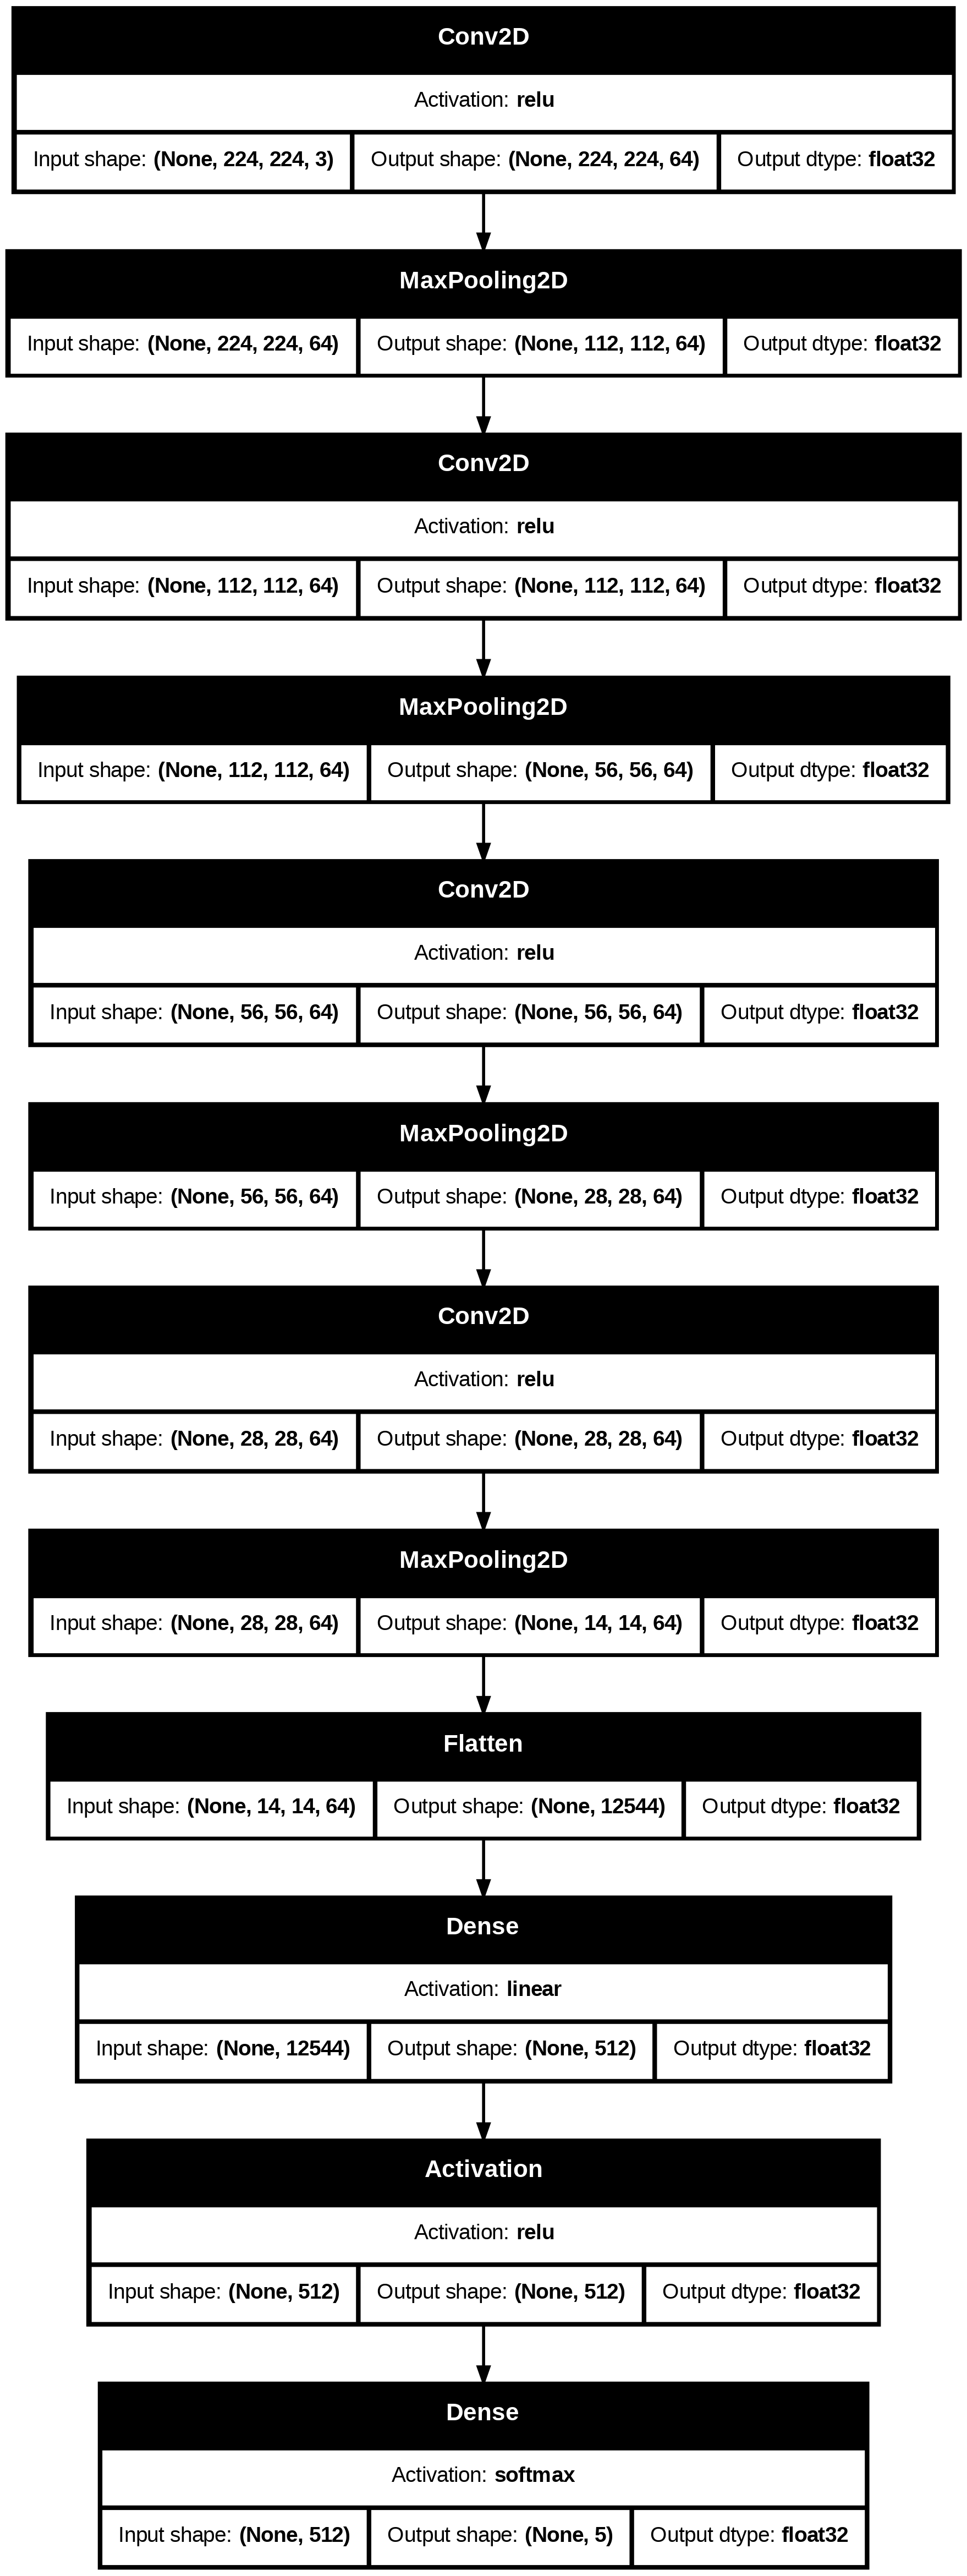

In [8]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True
)


#### fitting and training of model

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
			loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
epochs=50
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 69s 951ms/step - accuracy: 0.2374 - loss: 1.6147 - val_accuracy: 0.4488 - val_loss: 1.1974
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 62s 775ms/step - accuracy: 0.5159 - loss: 1.1736 - val_accuracy: 0.5233 - val_loss: 1.1083
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 82s 769ms/step - accuracy: 0.5880 - loss: 1.0218 - val_accuracy: 0.6279 - val_loss: 0.9618
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 86s 821ms/step - accuracy: 0.6353 - loss: 0.9300 - val_accuracy: 0.6209 - val_loss: 0.9348
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 47s 771ms/step - accuracy: 0.6740 - loss: 0.8555 - val_accuracy: 0.6267 - val_loss: 0.9662
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 50s 809ms/step - accuracy: 0.6874 - loss: 0.8044 - val_accuracy: 0.6174 - val_loss: 0.9467
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 47s 776ms/step - accuracy: 0.6859 - loss: 0.8427 - val_accuracy: 0.6628 - val_loss: 0.8628
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 48s 759ms/step - accuracy: 0.7094 - loss: 0.7445 - val_accuracy: 0.661

####Model Evaluation and Prediction

In [11]:
from tensorflow.keras.models import load_model
model.save('Model.h5')

# load model
savedModel=load_model('Model.h5')



In [12]:
train_datagen.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0. 0. 1. 0. 0.]]
Rose


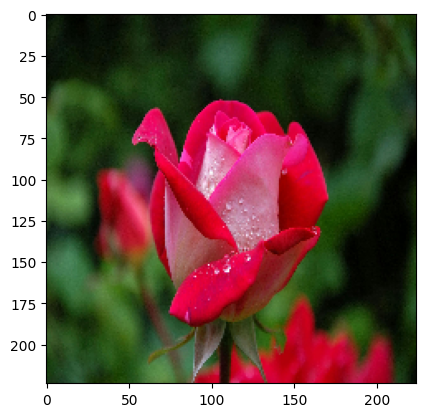

In [18]:
from keras.preprocessing import image

#Creating list for mapping
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip']

#Input image
test_image = image.load_img('rose-pink.jpeg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
	   print(list_[i])
	   break
